# Ep 6 Bernstein-Vazirani Alogrithm

This is the episode 6 of Qiskit on Bernstein-Vazirani Algorithm. This algorithm helps us to obtain the binary nubmer with the minimum guess. Here is the trick, we have 3 options:

Now we have 6 digits of binary number, say, 101001 (You can change what number as you like. I have changed 101001 to 1010 for demonstration.)

Option 1:Trial and ask for the answer every time, then you have to guess 2^6 times, i.e., 64 times. In general, you need to guess 2^n trials.

Option 2:Use classical computer operation AND, putting 1 at every single position of the digits, 0 or 1, and then compare them. If there are two 1s, the result will be 1, otherwise, it gives 0. So, the tactics is to find the 1 in every single position, when no 1 just left out 0. After that, you will get the exact binary number. You have 6 digits, so you need 6 operations. In general, you need to guess n trials.

Option 3: Use quantum computer, and we only need one trial. 

So let's try!

In [1]:
from qiskit import *

In [2]:
%matplotlib inline

In [3]:
from qiskit.tools.visualization import plot_histogram

So that is our secret number for guessing.

In [4]:
secretnumber = '1010'

Now let's build the circuit, we have 6 digits of numbers plus one qubit, so there are 7 qubits. And 6 classical bits on which we'll store results.

In [5]:
circuit = QuantumCircuit(len(secretnumber)+1, len(secretnumber))

Hadamard gate on the first 6 digits. Write circuit.h([0,1,2,3,4,5])

In [6]:
#circuit.h([0,1,2,3,4,5])
circuit.h(range(len(secretnumber)))

After drawing the circuit, we wiill apply X gate and then Hadarmard gate on the 6th qubits.

In [7]:
#circuit.x(6)
circuit.x(len(secretnumber))
#circuit.h(6)
circuit.h(len(secretnumber))

Adding a vertical line barrier is for clearity.

In [8]:
circuit.barrier()

View below the description for this conditional operation.

In [9]:
for ii, yesno in enumerate(reversed(secretnumber)):

    if yesno == '1':
    
        circuit.cx(ii, len(secretnumber))

Next, we can build the box for the secret number. We apply CXgate on every single qubit. We apply on the last qubit we did not have the X on, up to that qubit that is the last qubit in the lines. Then we act on the position with digit 1. 101001 (5th,4th,3rd,2nd,1st,0th)

In [10]:
#circuit.cx(5,6)
#circuit.cx(3,6)
#circuit.cx(0,6)

We can see the secret number is encoded in the box by reading 1 when you see the controlled X gate. we can apply a barrier.  

In [11]:
circuit.barrier()

Finally, a set of Hadarmard gates will be applied.

In [12]:
#circuit.h([0,1,2,3,4,5])
circuit.h(range(len(secretnumber)))

We put another barrier.

In [13]:
circuit.barrier()

Finally, here is our Bernstein-Vzarni Algorithm. We are going to add measurement at the end. We apply on the first 6 qubits, and then store the info on the corresponding classical bits.

In [14]:
circuit.measure(range(len(secretnumber)), range(len(secretnumber)))

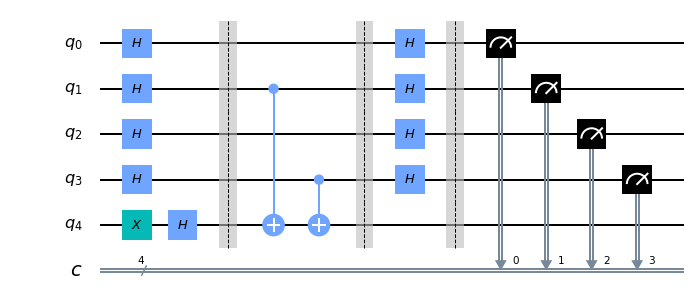

In [15]:
circuit.draw(output='mpl')

We are done and we are going to simulate the circuit.

We now use the simulator Aer.get_backend('qasm_simulator')
We execute the circuit we have built. 
We chhose backend as the simulator
We choose 1 shot as proimised. 
Finally, we take the result of the execution, store to the variable called result. 
Counts is result.get_counts

In [16]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1).result()
counts = result.get_counts()
print(counts)

{'1010': 1}


Now, we try to generalize the problem that we can guess as many secret number as we want. So we use rnage(len(secretnumber)) as the argument. So the python will return exact the array for this particular secret number. 

After changing the parameter in the circuit gate, let's deal with the box. The box is encoded by the circuit CX gate whereever we saw a one in the secret number.

for ii, yesno in enumerate(reveresed(secretnumber)):

We need to reverse the order as we apply the gate from the bottommost qubit

if the string contatins 1
if yesno == '1';

then we will apply CX gate going from the index of that qubit to the last qubit.
    
    circuit.cx(ii, len(secretnumber))
    
    
The last thing is the generalize the length of the secret number.

len(secretnumber)+1, len(secretnumber)